In [1]:
library(Seurat)
library(dplyr)
library(RColorBrewer)
library(ggplot2)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: 'SeuratObject'


The following object is masked from 'package:base':

    intersect



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
# Load object
sr <- readRDS("data/shortread_10X_5UTR_singlecell_mecom2/AML_subset_ilse.rds")

In [3]:
s1 <- unique(sr@meta.data$orig.ident)
s2 <- unique(sr@meta.data$sample_ID)
s1
s2

[1] "10326" "3656"  "4543"  "BM_1"  "mPB_2" "028"   "4063"  "3667"  "3622" 
[10] "112"   "BM_3"  "111"   "BM_5"  "335"   "492"   "7437M" "8121"  "10194"

[1] "MECOM-10326" "MECOM-3656"  "MECOM-4543"  "BM-1"        "MPB-2"      
 [6] "MECOM-028"   "MECOM-4063"  "MECOM-3667"  "MECOM-3622"  "MECOM-112"  
[11] "BM-3"        "MECOM-111"   "BM-5"        "AML-335"     "AML-492"    
[16] "MECOM-7347"  "AML-8121"    "AML-10194"

In [13]:
head(sr)
old.cells <- colnames(sr)
new.cells <- sub("-.*", "", old.cells)
new.cells <- paste(new.cells, sr@meta.data$orig.ident, sep = "-")

old.cells[1:5]
new.cells[1:5]

sr <- RenameCells(sr, new.names = new.cells)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,seurat_clusters,sample_ID,MECOM_simple,AML_sep,sample_ID_h,diagnosis,tissue,diagnosis.tissue,chr7,S.Score,G2M.Score,Phase,old.ident,celltype,AML_CML_sep,celltype_2
,<chr>,<dbl>,<int>,<dbl>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<fct>,<fct>,<chr>,<fct>
AAACCTGAGAAACCTA-10326,10326,2020,1110,2.5247525,3,MECOM-10326,MECOM,MECOM_del,MECOM_del_MDS,MDS_del,MDS_BM,MDS_del_BM,MECOM-norm-7,-0.032327131,-0.07768898,G1,3,NK cell,MECOM_del_MDS,NK cell
AAACCTGAGACAGGCT-10326,10326,4504,1454,1.7317940,5,MECOM-10326,MECOM,MECOM_del,MECOM_del_MDS,MDS_del,MDS_BM,MDS_del_BM,MECOM-norm-7,0.436330589,0.44019725,G2M,5,Early erythroid prog,MECOM_del_MDS,Early erythroid prog
AAACCTGAGAGCTGCA-10326,10326,5896,1647,0.5766621,5,MECOM-10326,MECOM,MECOM_del,MECOM_del_MDS,MDS_del,MDS_BM,MDS_del_BM,MECOM-norm-7,0.052661237,1.05501398,G2M,5,Early erythroid prog,MECOM_del_MDS,Early erythroid prog
AAACCTGAGAGGTACC-10326,10326,5005,661,0.0999001,7,MECOM-10326,MECOM,MECOM_del,MECOM_del_MDS,MDS_del,MDS_BM,MDS_del_BM,MECOM-norm-7,-0.030632712,0.01159983,G2M,7,Late erythroid prog,MECOM_del_MDS,Late erythroid prog
AAACCTGAGATCTGAA-10326,10326,5000,839,0.0600000,7,MECOM-10326,MECOM,MECOM_del,MECOM_del_MDS,MDS_del,MDS_BM,MDS_del_BM,MECOM-norm-7,-0.047236203,-0.05002763,G1,7,Late erythroid prog,MECOM_del_MDS,Late erythroid prog
AAACCTGAGCCAACAG-10326,10326,9059,1778,1.1369908,5,MECOM-10326,MECOM,MECOM_del,MECOM_del_MDS,MDS_del,MDS_BM,MDS_del_BM,MECOM-norm-7,0.155335779,0.97684156,G2M,5,Early erythroid prog,MECOM_del_MDS,Early erythroid prog
AAACCTGAGCGTGTCC-10326,10326,978,748,4.3967280,8,MECOM-10326,MECOM,MECOM_del,MECOM_del_MDS,MDS_del,MDS_BM,MDS_del_BM,MECOM-norm-7,-0.002966658,-0.03792890,G1,8,CD4+ T cell,MECOM_del_MDS,T cell
AAACCTGAGCGTTGCC-10326,10326,15833,3917,2.3179435,11,MECOM-10326,MECOM,MECOM_del,MECOM_del_MDS,MDS_del,MDS_BM,MDS_del_BM,MECOM-norm-7,0.019610709,0.74152090,G2M,11,GMP,MECOM_del_MDS,GMP
AAACCTGAGTCTTGCA-10326,10326,8332,2397,0.8401344,5,MECOM-10326,MECOM,MECOM_del,MECOM_del_MDS,MDS_del,MDS_BM,MDS_del_BM,MECOM-norm-7,0.163536397,0.49964484,G2M,5,Early erythroid prog,MECOM_del_MDS,Early erythroid prog


[1] "AAACCTGAGAAACCTA-10326" "AAACCTGAGACAGGCT-10326" "AAACCTGAGAGCTGCA-10326"
[4] "AAACCTGAGAGGTACC-10326" "AAACCTGAGATCTGAA-10326"

[1] "AAACCTGAGAAACCTA-10326" "AAACCTGAGACAGGCT-10326" "AAACCTGAGAGCTGCA-10326"
[4] "AAACCTGAGAGGTACC-10326" "AAACCTGAGATCTGAA-10326"

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



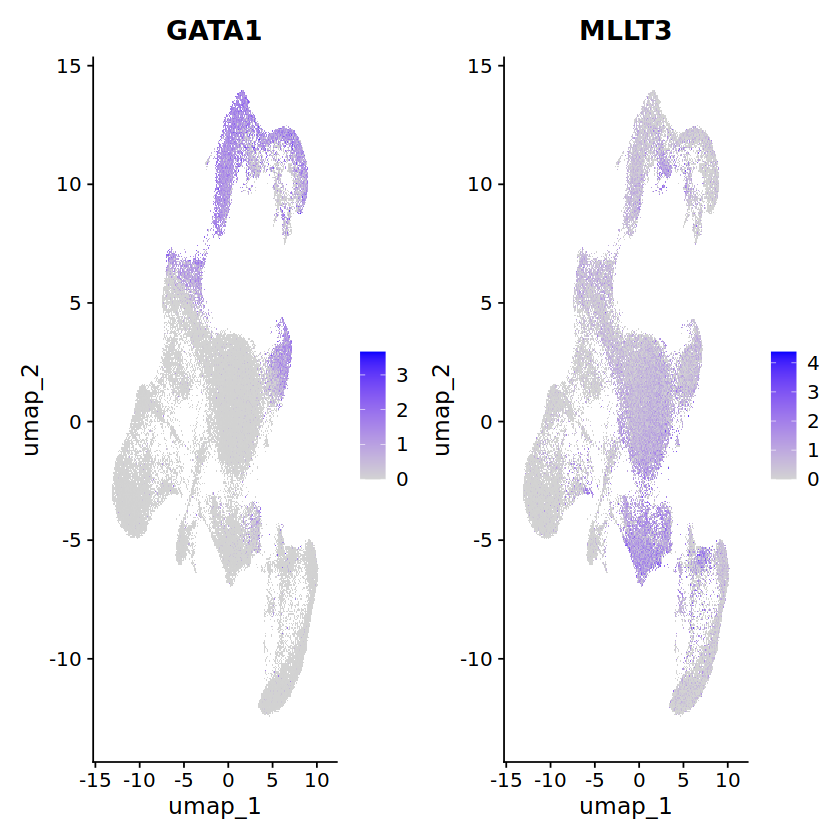

In [14]:
features = c("GATA1", "MLLT3", "MECOM")
FeaturePlot(sr, features = features, reduction = "umap")


# Add mutations

In [16]:
mutations <- read.csv("data/shortread_10X_5UTR_singlecell_mecom2/variants_of_interest.tsv", sep = '\t')
names(mutations)[1] <- 'sm'
names(mutations)[2] <- 'bc'
mutations$bc <- paste(mutations$bc, mutations$sm, sep = '-')
head(mutations)

,sm,bc,chr17_76736877_G_C_c.284C.G_sr_cov,chr17_76736877_G_C_c.284C.G_sr_ratio,chr3_128483924_G_C_c.953C.G_sr_cov,chr3_128483924_G_C_c.953C.G_sr_ratio,chr5_171410539_C_CTCTG_c.860_863dup_sr_cov,chr5_171410539_C_CTCTG_c.860_863dup_sr_ratio,chr2_197402097_A_T_c.2111T.A_sr_cov,chr2_197402097_A_T_c.2111T.A_sr_ratio,...,chr13_28034118_G_GATCATATTCATATTCTCTGAA_c.1780_1800dup_sr_cov,chr13_28034118_G_GATCATATTCATATTCTCTGAA_c.1780_1800dup_sr_ratio,chr13_28034106_A_ACTCCCATTTGAGATCATATTCATATTCTCTGAAATCAACGTAGAAGTACTCATTATCTGAGGAGCC_c.1747_1812dup_sr_cov,chr13_28034106_A_ACTCCCATTTGAGATCATATTCATATTCTCTGAAATCAACGTAGAAGTACTCATTATCTGAGGAGCC_c.1747_1812dup_sr_ratio,chr21_34880568_C_CG_c.496dup_sr_cov,chr21_34880568_C_CG_c.496dup_sr_ratio,chr20_32434474_C_T_c.1762C.T_sr_cov,chr20_32434474_C_T_c.1762C.T_sr_ratio,chr7_101817640_A_G_c.1A.G_sr_cov,chr7_101817640_A_G_c.1A.G_sr_ratio
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,8121,ACAGCCGAGTCACGCC-8121,1,1,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,8121,CGCCAAGGTTACTGAC-8121,1,1,1,1,1,0,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,8121,TGGACGCTCGCCGTGA-8121,1,1,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,8121,CTGATAGTCGCACTCT-8121,1,1,NA,NA,NA,NA,1,1,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,8121,CACACAAAGAAACCGC-8121,1,1,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,8121,ACGATACGTAGCGTAG-8121,1,1,1,1,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [18]:
# Extract current Seurat metadata
sr[['bc']] <- colnames(sr)
sr_metadata <- sr@meta.data
sr_metadata$bc <- rownames(sr_metadata)

# Merge metadata (left join to keep all Seurat barcodes)
merged_metadata <- left_join(sr_metadata, mutations, by = "bc")

# Restore row names (barcodes) and remove redundant column
rownames(merged_metadata) <- merged_metadata$bc
merged_metadata$bc <- NULL

# Add updated metadata back to Seurat object
sr@meta.data <- merged_metadata
head(sr@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,seurat_clusters,sample_ID,MECOM_simple,AML_sep,sample_ID_h,diagnosis,...,chr13_28034118_G_GATCATATTCATATTCTCTGAA_c.1780_1800dup_sr_cov,chr13_28034118_G_GATCATATTCATATTCTCTGAA_c.1780_1800dup_sr_ratio,chr13_28034106_A_ACTCCCATTTGAGATCATATTCATATTCTCTGAAATCAACGTAGAAGTACTCATTATCTGAGGAGCC_c.1747_1812dup_sr_cov,chr13_28034106_A_ACTCCCATTTGAGATCATATTCATATTCTCTGAAATCAACGTAGAAGTACTCATTATCTGAGGAGCC_c.1747_1812dup_sr_ratio,chr21_34880568_C_CG_c.496dup_sr_cov,chr21_34880568_C_CG_c.496dup_sr_ratio,chr20_32434474_C_T_c.1762C.T_sr_cov,chr20_32434474_C_T_c.1762C.T_sr_ratio,chr7_101817640_A_G_c.1A.G_sr_cov,chr7_101817640_A_G_c.1A.G_sr_ratio
,<chr>,<dbl>,<int>,<dbl>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACCTGAGAAACCTA-10326,10326,2020,1110,2.5247525,3,MECOM-10326,MECOM,MECOM_del,MECOM_del_MDS,MDS_del,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AAACCTGAGACAGGCT-10326,10326,4504,1454,1.7317940,5,MECOM-10326,MECOM,MECOM_del,MECOM_del_MDS,MDS_del,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AAACCTGAGAGCTGCA-10326,10326,5896,1647,0.5766621,5,MECOM-10326,MECOM,MECOM_del,MECOM_del_MDS,MDS_del,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AAACCTGAGAGGTACC-10326,10326,5005,661,0.0999001,7,MECOM-10326,MECOM,MECOM_del,MECOM_del_MDS,MDS_del,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AAACCTGAGATCTGAA-10326,10326,5000,839,0.0600000,7,MECOM-10326,MECOM,MECOM_del,MECOM_del_MDS,MDS_del,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
AAACCTGAGCCAACAG-10326,10326,9059,1778,1.1369908,5,MECOM-10326,MECOM,MECOM_del,MECOM_del_MDS,MDS_del,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To di

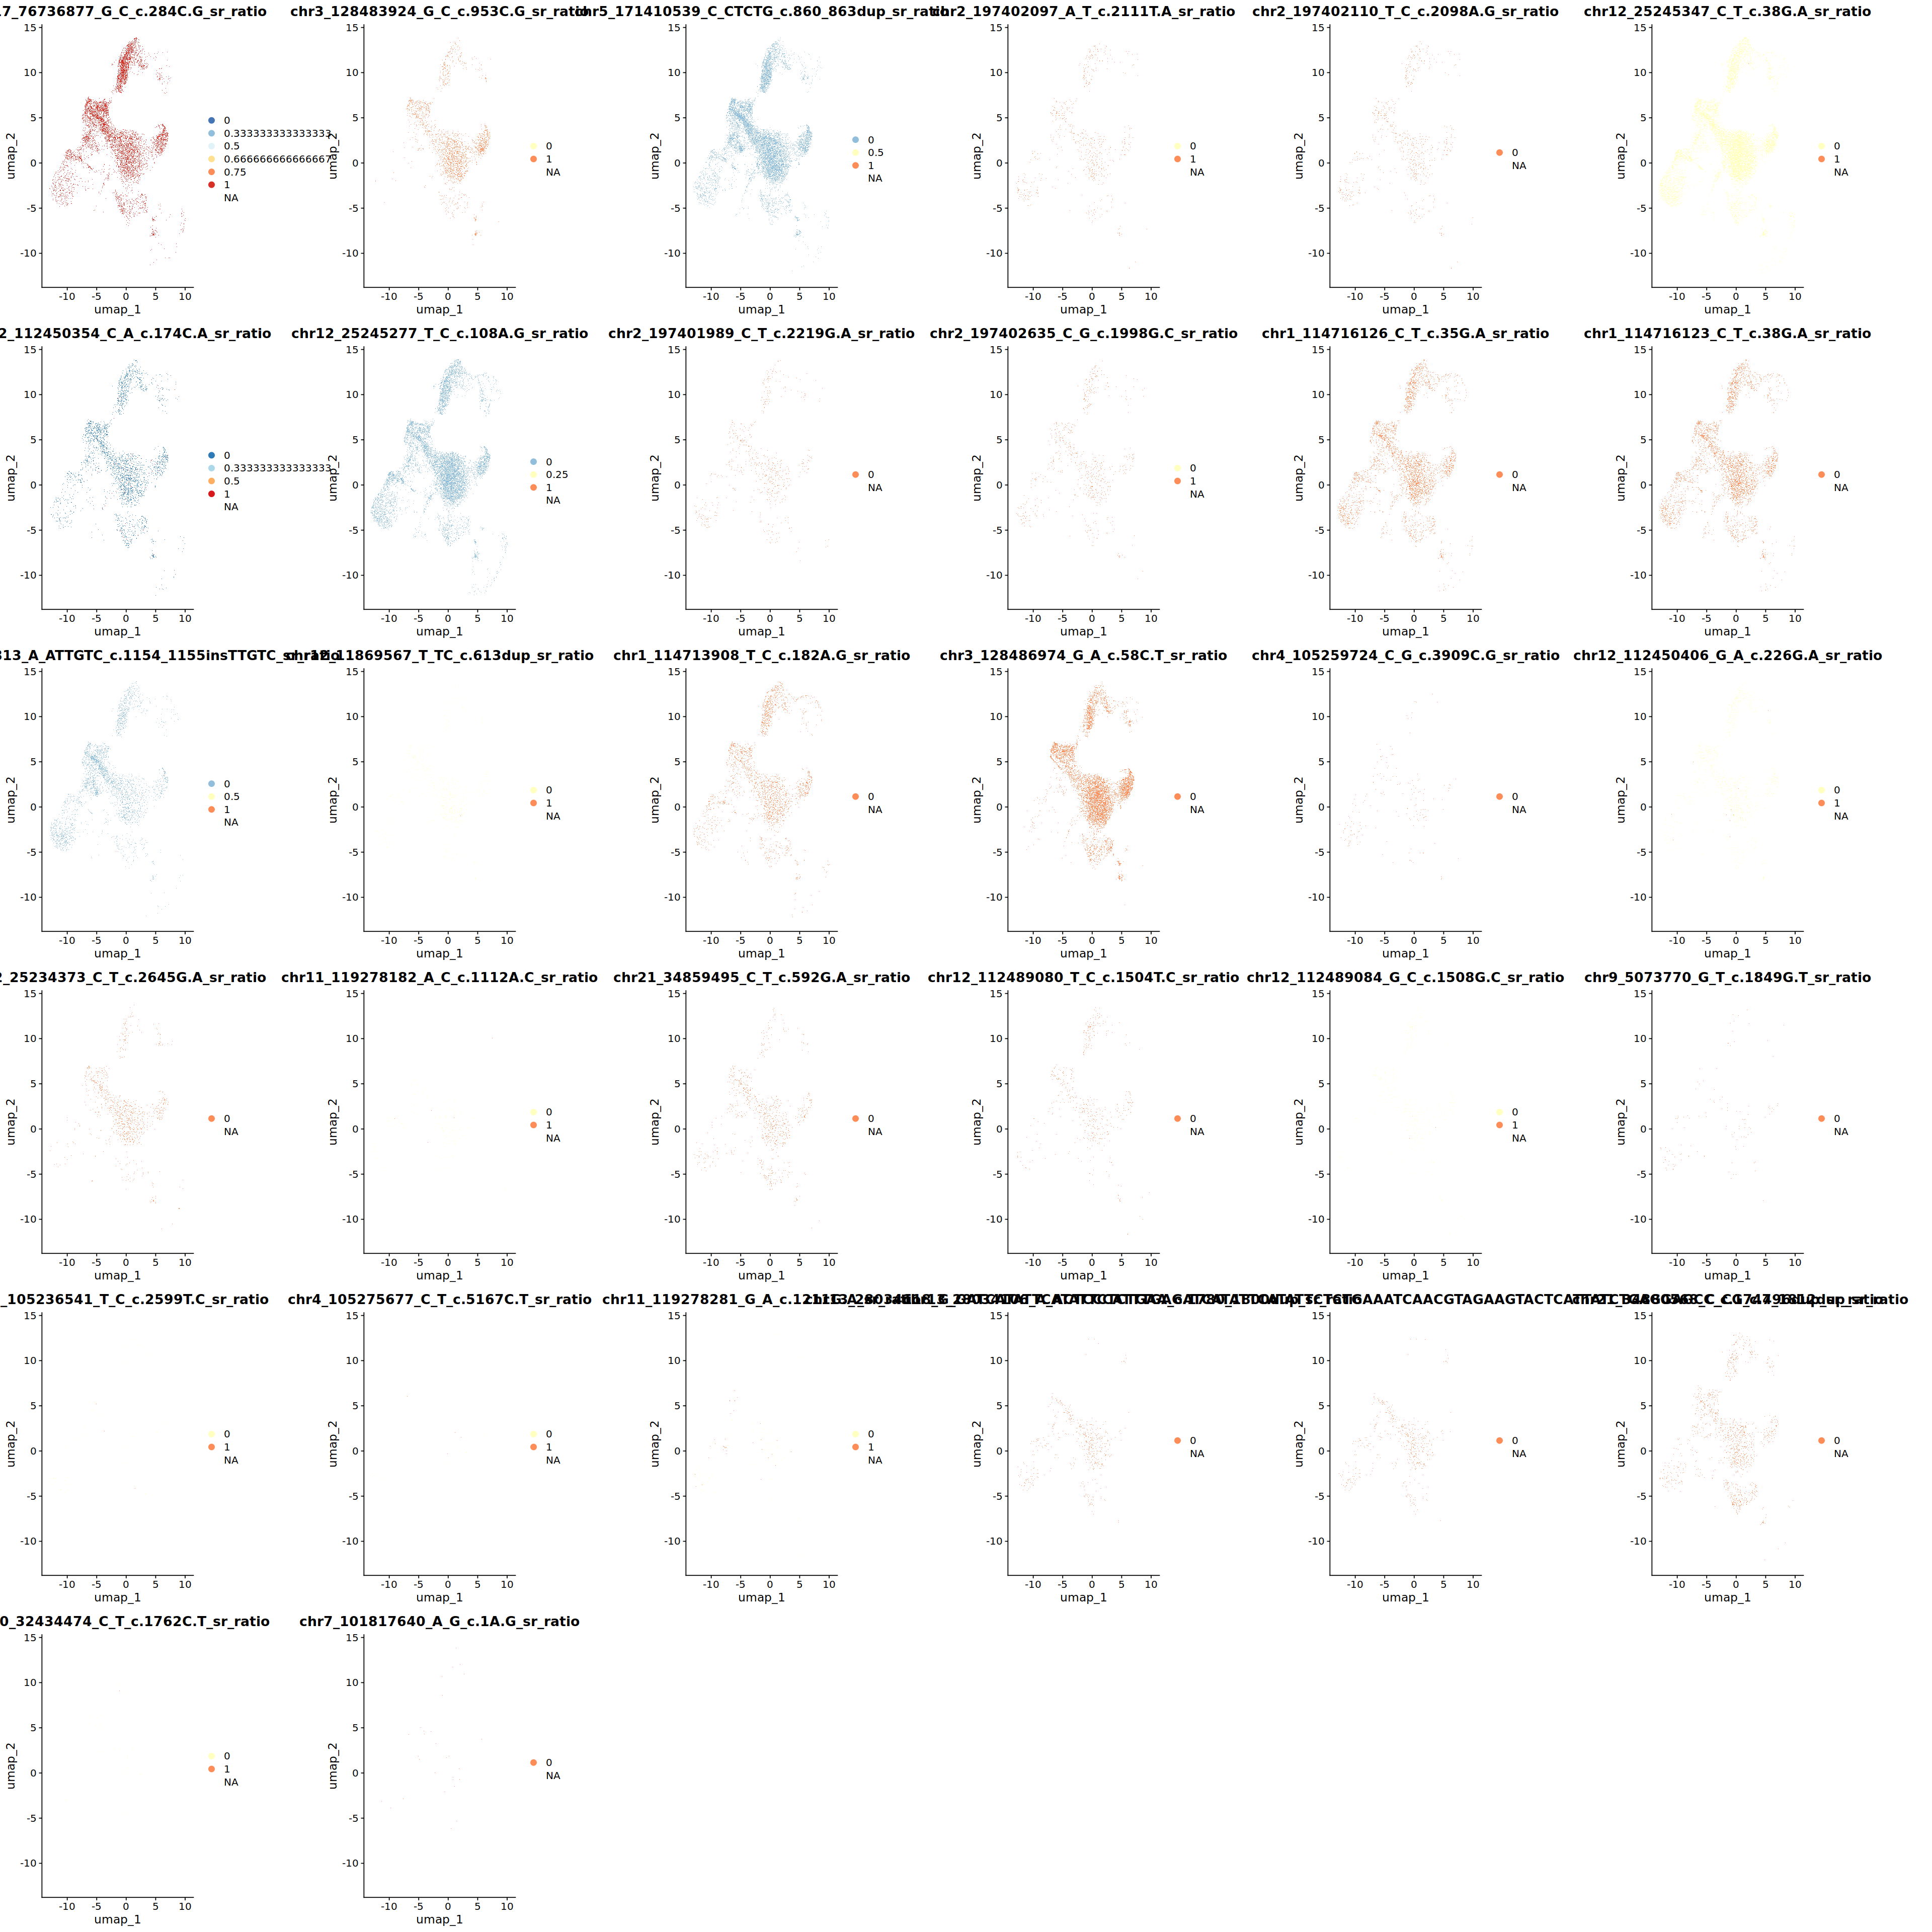

In [20]:
options(repr.plot.width =32, repr.plot.height = 32)
n <- names(sr@meta.data)
feats <- n[grepl("sr_ratio$", n)]

# Create FeaturePlot

plots <- DimPlot(sr, group.by = feats, combine = FALSE, reduction = "umap")

modified_plots <- lapply(plots, function(p) {
  p + scale_color_brewer(palette = "RdYlBu", direction = -1)
})

CombinePlots(modified_plots)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To di

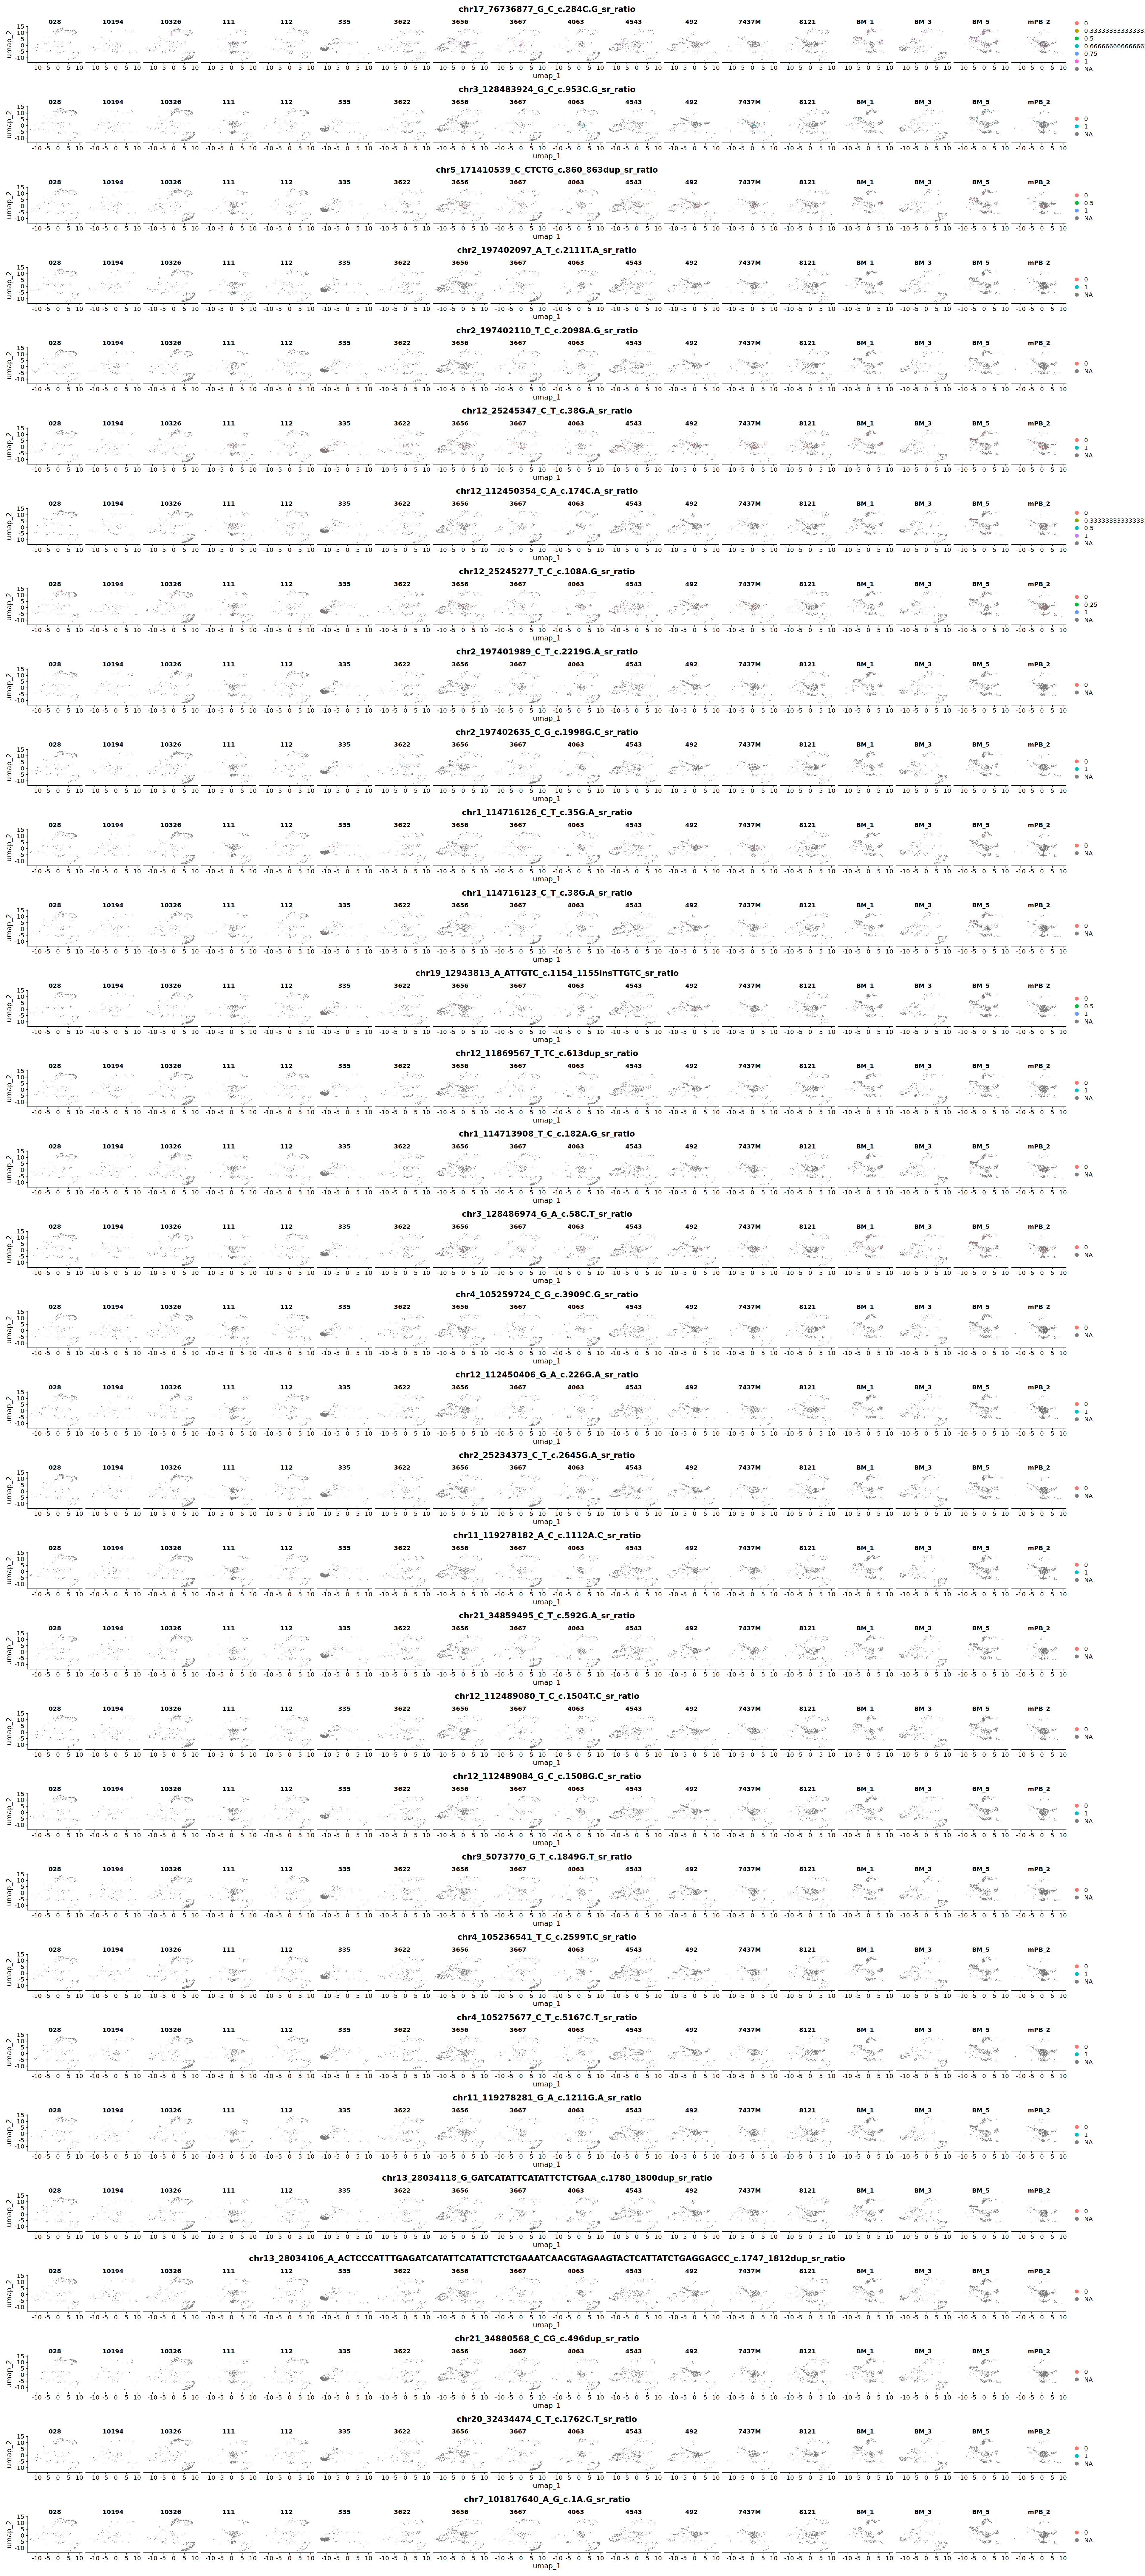

In [21]:
options(repr.plot.width =32, repr.plot.height = 72, warn = -1)
DimPlot(sr, group.by = feats, split.by = "orig.ident", reduction = "umap")

In [22]:
saveRDS(sr, "data/shortread_10X_5UTR_singlecell_mecom2/AML_subset_ilse.w_mut.rds")